<a href="https://colab.research.google.com/github/alamwasim/job-a-thon/blob/main/JOB_A_THON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing pycaret libraires and pandas profiling incase if not available

In [3]:
# !pip install pycaret
# !pip install category_encoders
# # pip install pandas-profiling==2.8.0

In [21]:
# Reference https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/pages/getting_started.html
# import sys
# !{sys.executable} -m pip install -U pandas-profiling[notebook]
# !jupyter nbextension enable --py widgetsnbextension

In [2]:
from pandas_profiling import ProfileReport
import pandas as pd
import numpy as np
import pandas_profiling 
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
from pycaret.classification import *
import category_encoders as ce
from sklearn.model_selection import train_test_split

# Importing Data from locally uploaded csv file

In [3]:
train=pd.read_csv('/content/jobathon_train.csv')
test=pd.read_csv('/content/jobathon_test.csv')

In [6]:
train.shape,test.shape

((50882, 14), (21805, 13))

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [9]:
train.head()

ID City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  Upper_Age  \
0   1        C3         3213            Rented          Individual         36   
1   2        C5         1117             Owned               Joint         75   
2   3        C5         3732             Owned          Individual         32   
3   4       C24         4378             Owned               Joint         52   
4   5        C8         2190            Rented          Individual         44   

   Lower_Age Is_Spouse Health Indicator Holding_Policy_Duration  \
0         36        No               X1                     14+   
1         22        No               X2                     NaN   
2         32        No              NaN                     1.0   
3         48        No               X1                     14+   
4         44        No               X2                     3.0   

   Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  Response  
0                  3.0               22              11628.0         0  
1                  NaN               22              30510.0         0  
2                  1.0               19               7450.0         1  
3                  3.0               19              17780.0         0  
4                  1.0               16              10404.0         0

In [22]:
print("New Region Code in test dataset",len(set(test.Region_Code.values)-set(train.Region_Code.values)))
print("Region Code in train dataset that are not present in test dataset",len(set(train.Region_Code.values)-set(test.Region_Code.values)))

New Region Code in test dataset 222
Region Code in train dataset that are not present in test dataset 844


# Pandas Profile Report

In [37]:
train_profile = ProfileReport(train, title="Pandas Profiling Report for train data")
test_profile = ProfileReport(test, title="Pandas Profiling Report for test data")

In [26]:
train_profile.to_notebook_iframe()

In [112]:
test_profile.to_notebook_iframe()

# Data Visualizations

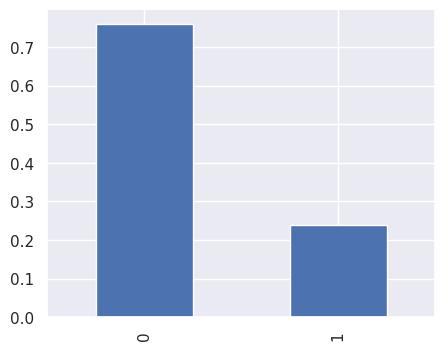

In [110]:
train.Response.value_counts(normalize=True).plot(kind='bar',figsize=[5,4])

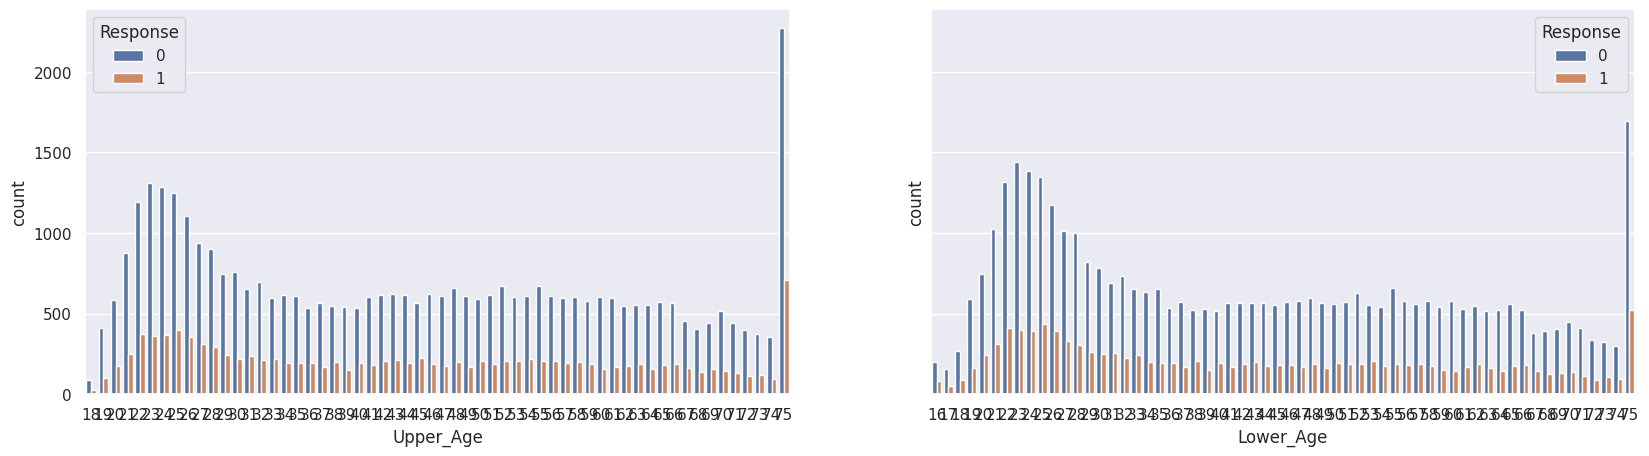

In [111]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(20, 5))
sns.countplot(x='Upper_Age', hue='Response', data=train,ax=axes[0])
sns.countplot(x='Lower_Age', hue='Response', data=train,ax=axes[1])

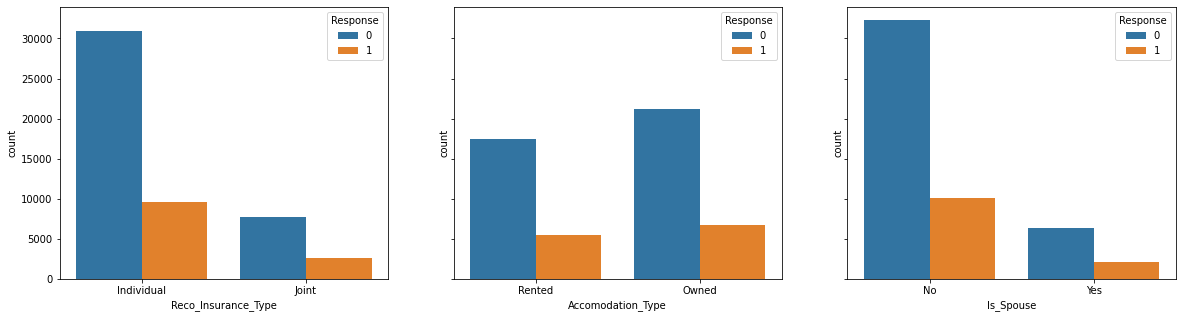

In [8]:
_, axes = plt.subplots(1, 3, sharey=True, figsize=(20, 5))
sns.countplot(x='Reco_Insurance_Type', hue='Response', data=train,ax=axes[0])
sns.countplot(x='Accomodation_Type', hue='Response', data=train,ax=axes[1])
sns.countplot(x='Is_Spouse', hue='Response', data=train,ax=axes[2])

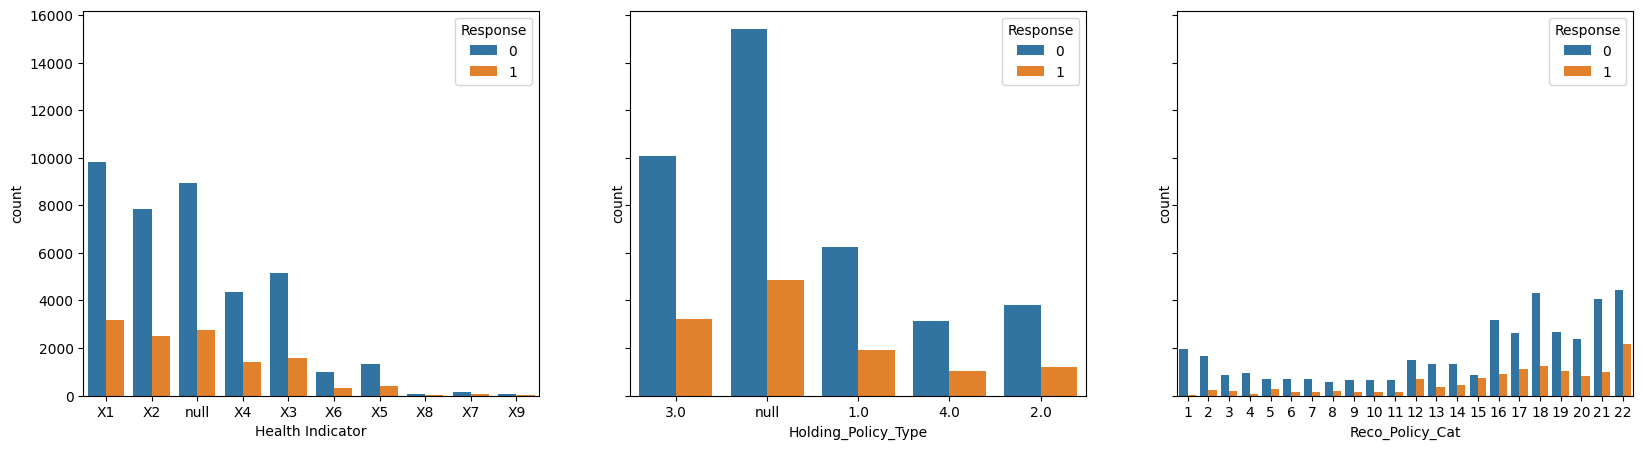

In [90]:
#Plot Graph of HealthIndicator, Holding_Policy_Type, Reco_Policy_Cat with Response
_, axes = plt.subplots(1, 3, sharey=True, figsize=(20, 5))
sns.countplot(x='Health Indicator', hue='Response', data=train,ax=axes[0])
sns.countplot(x='Holding_Policy_Type', hue='Response', data=train,ax=axes[1])
sns.countplot(x='Reco_Policy_Cat', hue='Response', data=train,ax=axes[2])

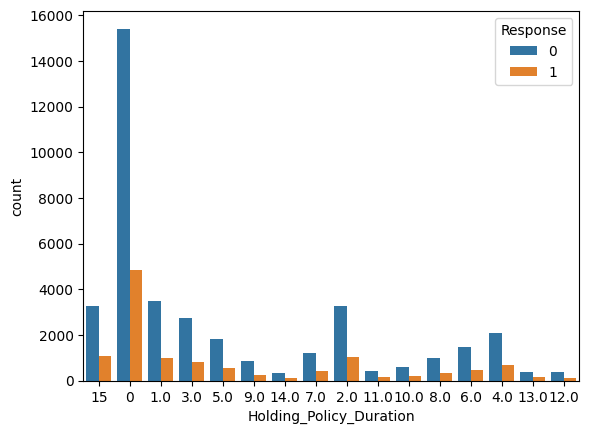

In [91]:
sns.countplot(x='Holding_Policy_Duration', hue='Response', data=train)

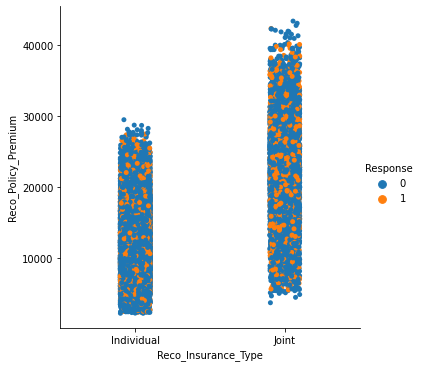

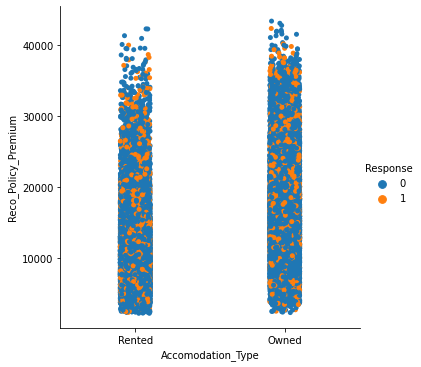

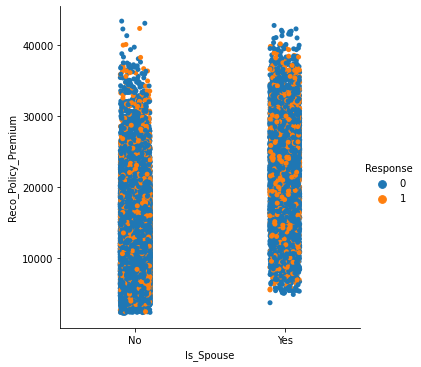

In [52]:
sns.catplot(x="Reco_Insurance_Type", y="Reco_Policy_Premium",hue='Response', data=train)
sns.catplot(x="Accomodation_Type", y="Reco_Policy_Premium",hue='Response', data=train)
sns.catplot(x="Is_Spouse", y="Reco_Policy_Premium",hue='Response', data=train)

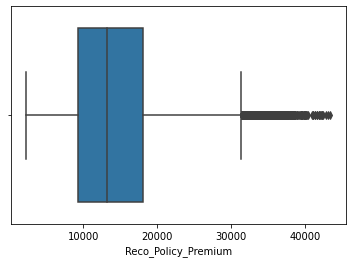

In [17]:
sns.boxplot(x='Reco_Policy_Premium', data=train);

In [68]:
a=train.groupby("City_Code")["Response"].agg(['mean','count']).reset_index()
a['count_perc']=100*a['count']/len(train)
a.sort_values('mean',ascending=False)

City_Code      mean  count  count_perc
23       C30  0.310345     58    0.113989
25       C32  0.287500    160    0.314453
28       C35  0.285714     56    0.110059
27       C34  0.276923    130    0.255493
15       C23  0.265758    587    1.153650
19       C27  0.257627    295    0.579773
4        C13  0.253731   1005    1.975158
33        C7  0.253403   1910    3.753783
26       C33  0.248252    286    0.562085
0         C1  0.246072   8973   17.634920
11        C2  0.244353   7747   15.225424
2        C11  0.243243   1147    2.254235
30        C4  0.242168   3671    7.214732
34        C8  0.241971   1806    3.549389
17       C25  0.240437    366    0.719311
9        C18  0.238394    797    1.566369
22        C3  0.237472   4889    9.608506
7        C16  0.237004   1135    2.230651
5        C14  0.235925    746    1.466137
32        C6  0.235897   1950    3.832397
21       C29  0.235142    387    0.760583
20       C28  0.235088    285    0.560119
16       C24  0.235081    553    1.086828
35        C9  0.233410   2185    4.294249
10       C19  0.231368    899    1.766833
14       C22  0.230620    516    1.014111
31        C5  0.230205   1364    2.680712
12       C20  0.228942    926    1.819897
8        C17  0.228645   1159    2.277819
13       C21  0.228277    679    1.334460
3        C12  0.228111    868    1.705908
1        C10  0.225947   1611    3.166149
18       C26  0.216433    499    0.980700
6        C15  0.213322   1186    2.330883
29       C36  0.138889     36    0.070752
24       C31  0.133333     15    0.029480

In [83]:
b=train.groupby("Region_Code")["Response"].agg(['mean','count']).reset_index()
b['count_perc']=100*b['count']/len(train)
b.sort_values('count',ascending=False)

Region_Code      mean  count  count_perc
0               1  0.260417     96    0.188672
3               5  0.186667     75    0.147400
4               6  0.232877     73    0.143469
1               2  0.178082     73    0.143469
2               4  0.191781     73    0.143469
...           ...       ...    ...         ...
4833         5477  1.000000      1    0.001965
4834         5478  1.000000      1    0.001965
4835         5479  0.000000      1    0.001965
4836         5480  0.000000      1    0.001965
5315         6194  1.000000      1    0.001965

[5316 rows x 4 columns]

# data Labelling and Encoding

In [79]:
train.head()

ID City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  Upper_Age  \
0   1        C3         3213            Rented          Individual         36   
1   2        C5         1117             Owned               Joint         75   
2   3        C5         3732             Owned          Individual         32   
3   4       C24         4378             Owned               Joint         52   
4   5        C8         2190            Rented          Individual         44   

   Lower_Age Is_Spouse Health Indicator Holding_Policy_Duration  \
0         36        No               X1                     14+   
1         22        No               X2                     NaN   
2         32        No              NaN                     1.0   
3         48        No               X1                     14+   
4         44        No               X2                     3.0   

   Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  Response  
0                  3.0               22              11628.0         0  
1                  NaN               22              30510.0         0  
2                  1.0               19               7450.0         1  
3                  3.0               19              17780.0         0  
4                  1.0               16              10404.0         0

In [4]:
#Replacing Missing Values with 'null' string. These all wil be treated as categorical data
train[['Health Indicator','Holding_Policy_Type']]=train[['Health Indicator','Holding_Policy_Type']].fillna("null")
test[['Health Indicator','Holding_Policy_Type']]=test[['Health Indicator','Holding_Policy_Type']].fillna("null")
#Replacing Null with 0 in Holding policy Duration
train[['Holding_Policy_Duration']]=train[['Holding_Policy_Duration']].fillna(0)
test[['Holding_Policy_Duration']]=test[['Holding_Policy_Duration']].fillna(0)
#Replacing 14+ as 15 in Holding policy Duration
train.loc[train.Holding_Policy_Duration=='14+','Holding_Policy_Duration']=15
test.loc[test.Holding_Policy_Duration=='14+','Holding_Policy_Duration']=15

In [5]:
#Creating new features 'Is_Holding_Policy' to indicate if particular ID holds any Policy or not base upon missing values in Holding Policy Type
train.loc[:,'Is_Holding_Policy']=1
train.loc[train.Holding_Policy_Type=="null",'Is_Holding_Policy']=0
test.loc[:,'Is_Holding_Policy']=1
test.loc[test.Holding_Policy_Type=="null",'Is_Holding_Policy']=0

In [6]:
#Creating new features 'mean_age' mean_age based upon lower and upper age
train.loc[:,'mean_age']=(train.Upper_Age+train.Lower_Age)/2
test.loc[:,'mean_age']=(test.Upper_Age+test.Lower_Age)/2

In [7]:
#Replacing binary columns['Accomodation_Type','Reco_Insurance_Type','Is_Spouse'] with 0 and 1
def le_fit(df,col):
  le_dict={}
  for c in col:
    le_dict[c]=dict(zip(train[c].unique(),range(train[c].nunique())))
  print("le_dict :",le_dict)
  return le_dict
def le_transform(df,col):
  for c in col:
    df[c]=df[c].map(le_dict[c])
le_col=['Accomodation_Type','Reco_Insurance_Type','Is_Spouse']
le_dict=le_fit(train,le_col)
le_transform(train,le_col)
le_transform(test,le_col)

le_dict : {'Accomodation_Type': {'Rented': 0, 'Owned': 1}, 'Reco_Insurance_Type': {'Individual': 0, 'Joint': 1}, 'Is_Spouse': {'No': 0, 'Yes': 1}}


In [8]:
#Target Encoding of City_Code and Region Code
te_cols=['City_Code','Region_Code','Reco_Policy_Cat','Holding_Policy_Duration','Health Indicator','Holding_Policy_Type']
te_cols_renamed=[x+"_te" for x in te_cols]
train[te_cols_renamed]=train[te_cols]
test[te_cols_renamed]=test[te_cols]
X_cols=[x for x in train.columns if x!='Response']
enc = ce.TargetEncoder(cols=te_cols_renamed,handle_unknown='value',smoothing=1,min_samples_leaf=1)
enc.fit(train[X_cols], train['Response'])
train[X_cols]=enc.transform(train[X_cols])
test[X_cols]=enc.transform(test[X_cols])

In [12]:
ohe_cols=['Health Indicator','Holding_Policy_Type']
can_be_ohe_col=['Holding_Policy_Duration']

In [19]:
train.groupby(['Health Indicator'])['Response'].agg(['mean','count'])#X8 and X9 can be clubbed together,(X8,X9)(X5,X6)(X3,X4)(X1,X2)

mean  count
Health Indicator                 
X1                0.244120  13010
X2                0.241096  10332
X3                0.236469   6762
X4                0.243079   5743
X5                0.236248   1727
X6                0.239844   1280
X7                0.316327    196
X8                0.230769     78
X9                0.222222     63
null              0.234197  11691

In [68]:
train['Health_Indicator_Grouped']=train['Health Indicator'].map({'X8':'G1','X9':'G1','X5':'G2','X6':'G2','X3':'G3','X4':'G3','X1':'G4','X2':'G4','X7':'G5','null':'G9'})
test['Health_Indicator_Grouped']=test['Health Indicator'].map({'X8':'G1','X9':'G1','X5':'G2','X6':'G2','X3':'G3','X4':'G3','X1':'G4','X2':'G4','X7':'G5','null':'G9'})
train.groupby(['Health_Indicator_Grouped'])['Response'].agg(['mean','count'])

mean  count
Health_Indicator_Grouped                 
G1                        0.226950    141
G2                        0.237779   3007
G3                        0.239504  12505
G4                        0.242781  23342
G5                        0.316327    196
G9                        0.234197  11691

In [69]:
train.Holding_Policy_Duration=train.Holding_Policy_Duration.astype('float32').astype('int32')
test.Holding_Policy_Duration=test.Holding_Policy_Duration.astype('float32').astype('int32')

In [70]:
train.head()

ID City_Code  ...  Holding_Policy_Type_te  Health_Indicator_Grouped
0   1        C3  ...                0.242262                        G4
1   2        C5  ...                0.238951                        G4
2   3        C5  ...                0.235776                        G9
3   4       C24  ...                0.242262                        G4
4   5        C8  ...                0.235776                        G4

[5 rows x 23 columns]

In [71]:
train.shape,test.shape

((50882, 23), (21805, 22))

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          50882 non-null  int64  
 1   City_Code                   50882 non-null  object 
 2   Region_Code                 50882 non-null  int64  
 3   Accomodation_Type           50882 non-null  int64  
 4   Reco_Insurance_Type         50882 non-null  int64  
 5   Upper_Age                   50882 non-null  int64  
 6   Lower_Age                   50882 non-null  int64  
 7   Is_Spouse                   50882 non-null  int64  
 8   Health Indicator            50882 non-null  object 
 9   Holding_Policy_Duration     50882 non-null  int32  
 10  Holding_Policy_Type         50882 non-null  object 
 11  Reco_Policy_Cat             50882 non-null  int64  
 12  Reco_Policy_Premium         50882 non-null  float64
 13  Response                    508

In [73]:
train.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response',
       'Is_Holding_Policy', 'mean_age', 'City_Code_te', 'Region_Code_te',
       'Reco_Policy_Cat_te', 'Holding_Policy_Duration_te',
       'Health Indicator_te', 'Holding_Policy_Type_te',
       'Health_Indicator_Grouped'],
      dtype='object')

# Correlation

In [335]:
train.corr()

ID  Region_Code  ...  Region_Code_te  Reco_Policy_Cat_te
ID                   1.000000    -0.000465  ...        0.003484            0.000531
Region_Code         -0.000465     1.000000  ...       -0.001109           -0.070442
Accomodation_Type    0.004649    -0.009105  ...        0.003099            0.001852
Reco_Insurance_Type -0.008505    -0.004275  ...        0.000982            0.015124
Upper_Age           -0.001725    -0.005649  ...        0.004700            0.005631
Lower_Age            0.001101    -0.005928  ...        0.002823           -0.001403
Is_Spouse           -0.004262    -0.002567  ...       -0.001264            0.014402
Reco_Policy_Cat     -0.002235    -0.065120  ...        0.040496            0.578397
Reco_Policy_Premium -0.002350    -0.010797  ...        0.003352            0.026319
Response             0.005159     0.001121  ...        0.299660            0.197651
Is_Holding_Policy    0.000817    -0.002427  ...        0.001677           -0.002117
mean_age            -0.000318    -0.005906  ...        0.003838            0.002156
City_Code_te         0.002423    -0.039372  ...        0.078195            0.039667
Region_Code_te       0.003484    -0.001109  ...        1.000000            0.067745
Reco_Policy_Cat_te   0.000531    -0.070442  ...        0.067745            1.000000

[15 rows x 15 columns]

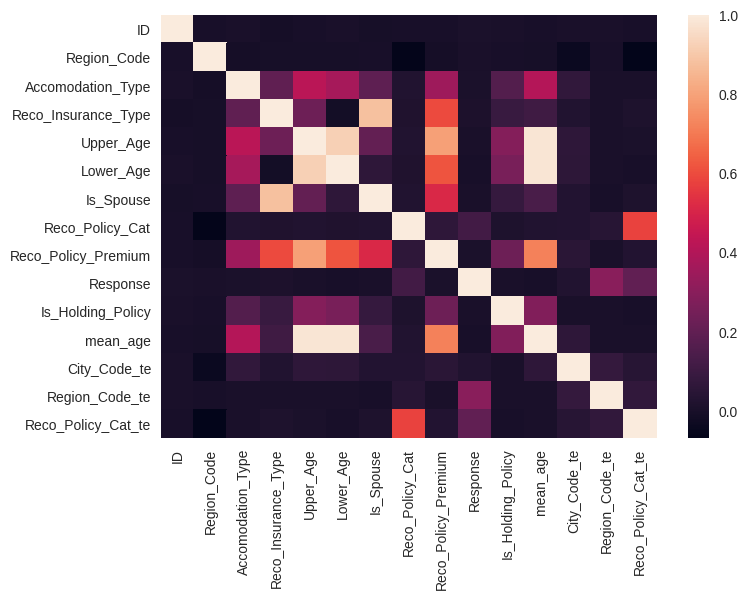

In [336]:
sns.heatmap(train.corr())

# Splitting DataSet and Categorizing Columns

In [13]:
sel_col=['ID',
         'City_Code_te', 'Region_Code_te','Reco_Policy_Cat_te','Holding_Policy_Duration_te','Health Indicator_te', 'Holding_Policy_Type_te',
         'Accomodation_Type','Reco_Insurance_Type', 'Is_Spouse','Is_Holding_Policy',
         'Health Indicator', 'Holding_Policy_Type','Reco_Policy_Cat', 'Holding_Policy_Duration',
        'mean_age','Reco_Policy_Premium',
        'Response']
left_out_col=[x for x in train.columns if x not in sel_col] # City Code and region Code can be used to encode in clustering fashion
categorical_features=['Health Indicator', 'Holding_Policy_Type','Reco_Policy_Cat','Holding_Policy_Duration',
                      'City_Code']
high_cardinality_features=['City_Code']
numeric_features=[x for x in sel_col[:-1] if x not in categorical_features] # Normalize 'Upper_Age', 'Lower_Age', 'mean_age','Reco_Policy_Premium' in ahead experiment
# Use SMOTE in next exp


In [12]:
left_out_col

['Region_Code',
 'Upper_Age',
 'Lower_Age',
 'City_Code_te',
 'Region_Code_te',
 'Reco_Policy_Cat_te',
 'Holding_Policy_Duration_te',
 'Health Indicator_te',
 'Holding_Policy_Type_te']

In [10]:
train_data, test_data, y_train, y_test = train_test_split(
    train[sel_col], train[sel_col[-1]], test_size=0.2, random_state=786)
train_data.shape,test_data.shape,train.shape,train_data.shape[0]+test_data.shape[0]

((40705, 13), (10177, 13), (50882, 22), 50882)

# Pycaret Setup

In [340]:
exp1 = setup(data = train_data,session_id=786,ignore_features=['ID'],
             categorical_features=categorical_features, numeric_features=numeric_features, 
             log_experiment=True,profile=True,
             target = 'Response')

Description             Value
0                               session_id               786
1                                   Target          Response
2                              Target Type            Binary
3                            Label Encoded        0: 0, 1: 1
4                            Original Data       (40705, 14)
5                           Missing Values             False
6                         Numeric Features                10
7                     Categorical Features                 2
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set       (28493, 24)
12                    Transformed Test Set       (12212, 24)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment              True
20                         Experiment Name  clf-default-name
21                                     USI              e5d5
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44                              Clustering             False
45                    Clustering Iteration              None
46                     Polynomial Features             False
47                       Polynomial Degree              None
48                    Trignometry Features             False
49                    Polynomial Threshold              None
50                          Group Features             False
51                       Feature Selection             False
52                Feature Selection Method           classic
53            Features Selection Threshold              None
54                     Feature Interaction             False
55                           Feature Ratio             False
56                   Interaction Threshold              None
57                           Fix Imbalance             False
58                    Fix Imbalance Method             SMOTE

Data Profiler Failed. No output to show, please continue with Modeling.


In [341]:
top5=compare_models(n_select=5,sort='auc')
top5_summary=pull()
top5_summary
top5_model_name=top5_summary.index.to_list()[:5]

Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.7715  0.7381  0.1691  0.5822   
gbc          Gradient Boosting Classifier    0.7710  0.7347  0.1439  0.5946   
lda          Linear Discriminant Analysis    0.7691  0.7287  0.1685  0.5640   
ada                  Ada Boost Classifier    0.7696  0.7262  0.1385  0.5846   
rf               Random Forest Classifier    0.7642  0.7143  0.1552  0.5291   
et                 Extra Trees Classifier    0.7565  0.6902  0.1553  0.4776   
nb                            Naive Bayes    0.7603  0.6850  0.0013  0.4000   
dt               Decision Tree Classifier    0.6847  0.5784  0.3739  0.3523   
lr                    Logistic Regression    0.7616  0.5313  0.0158  0.0628   
knn                K Neighbors Classifier    0.7095  0.5057  0.0926  0.2343   
qda       Quadratic Discriminant Analysis    0.4331  0.5051  0.6425  0.2433   
svm                   SVM - Linear Kernel    0.6044  0.0000  0.2997  0.0721   
ridge                    Ridge Classifier    0.7691  0.0000  0.1072  0.6067   

              F1   Kappa     MCC  TT (Sec)  
lightgbm  0.2617  0.1726  0.2192     0.333  
gbc       0.2315  0.1524  0.2061     3.333  
lda       0.2592  0.1673  0.2106     0.119  
ada       0.2237  0.1452  0.1979     0.891  
rf        0.2398  0.1472  0.1863     3.296  
et        0.2342  0.1321  0.1618     3.009  
nb        0.0026  0.0019  0.0186     0.047  
dt        0.3627  0.1535  0.1537     0.210  
lr        0.0252  0.0172  0.0230     0.573  
knn       0.1326 -0.0039 -0.0045     0.304  
qda       0.3497  0.0067  0.0083     0.061  
svm       0.1162  0.0001  0.0014     1.084  
ridge     0.1821  0.1186  0.1806     0.045

In [342]:
pred_eval=pd.DataFrame()
for model,name in zip(top5,top5_model_name):
  pred=predict_model(model,test_data,raw_score=True)
  pred_eval[name]=get_metrics()['Score Function'][1:2].apply(lambda x :x(pred['Response'],pred['Score_1']))
  # pred_eval[name+"_custom_auc"]=roc_auc_score(pred['Response'],pred['Score_1'])
pred_eval

lightgbm       gbc       lda       ada        rf
ID                                                   
auc  0.746187  0.744643  0.738915  0.737135  0.725443

## Model Evaluation

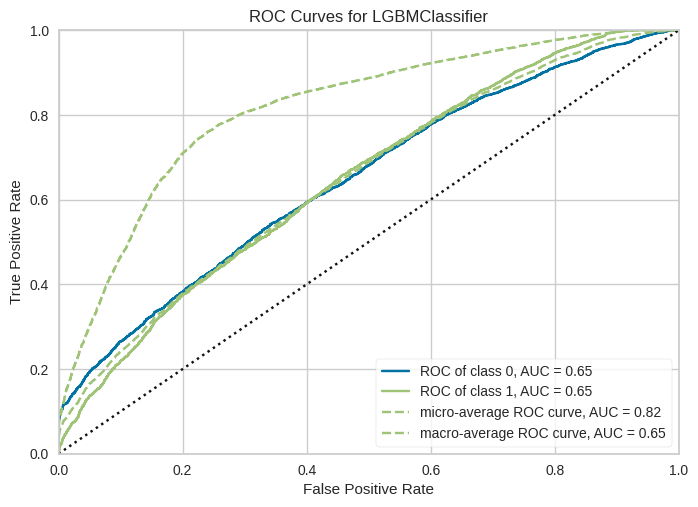

In [254]:
plot_model(top5[0])

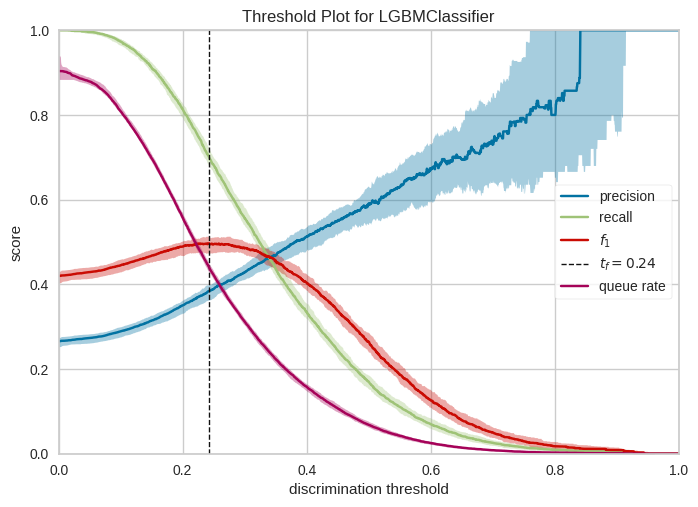

In [262]:
plot_model(top5[0],plot='threshold')

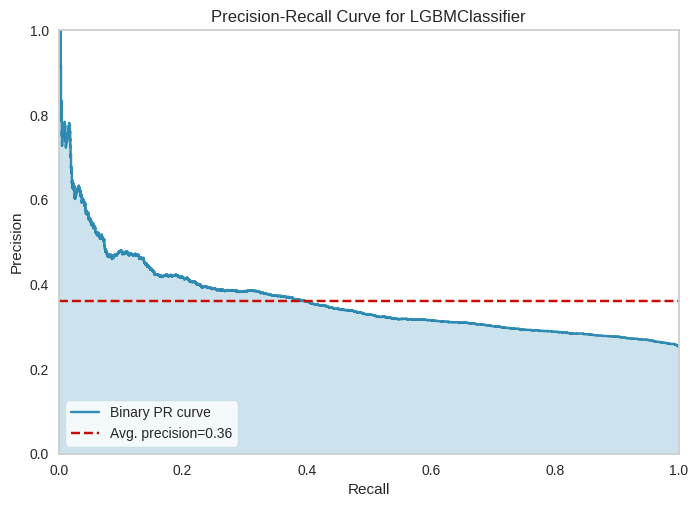

In [263]:
plot_model(top5[0],plot='pr')

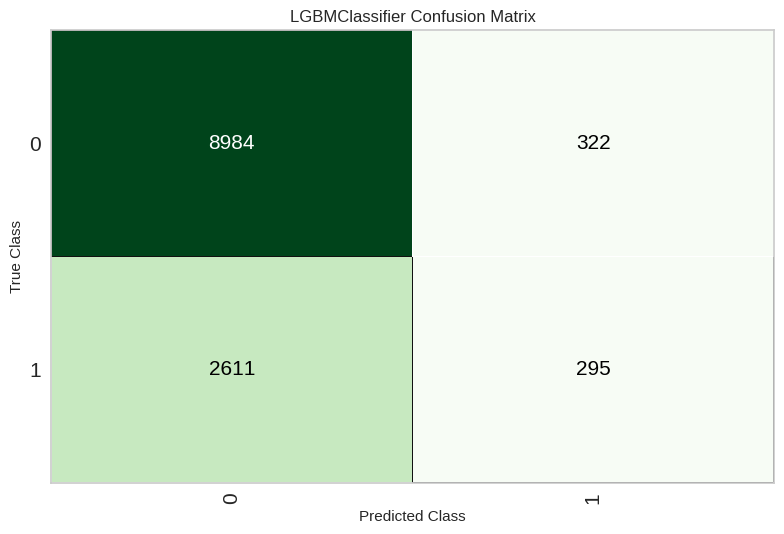

In [264]:
plot_model(top5[0],plot='confusion_matrix')

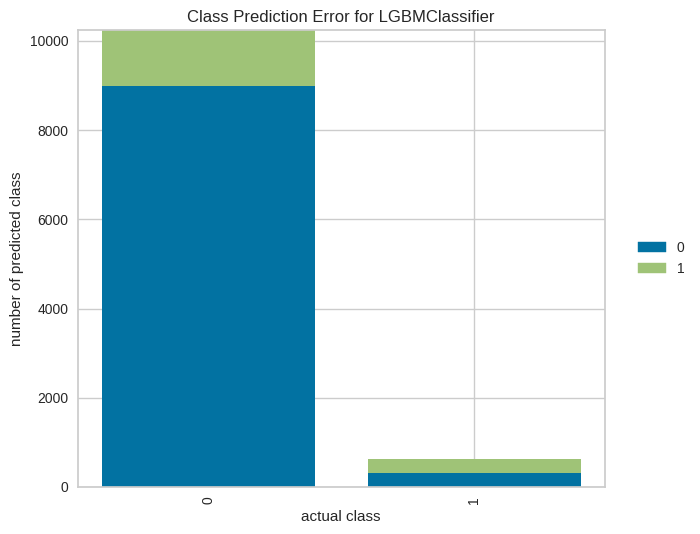

In [265]:
plot_model(top5[0],plot='error')

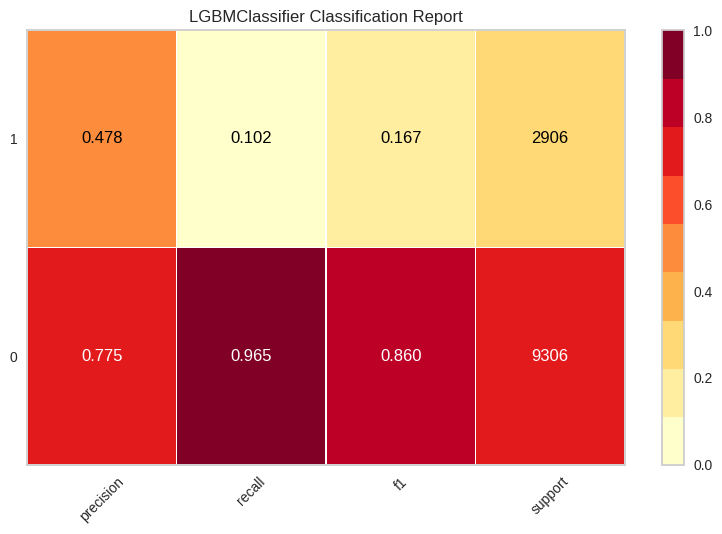

In [266]:
plot_model(top5[0],plot='class_report')

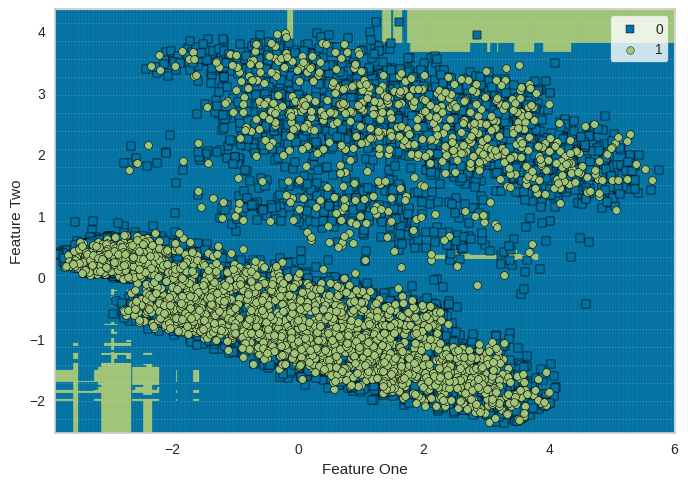

In [267]:
plot_model(top5[0],plot='boundary')

In [284]:
# plot_model(top5[0],plot='rfe')

In [ ]:
plot_model(top5[0],plot='learning')

In [ ]:
plot_model(top5[0],plot='manifold')

In [ ]:
plot_model(top5[0],plot='calibration')

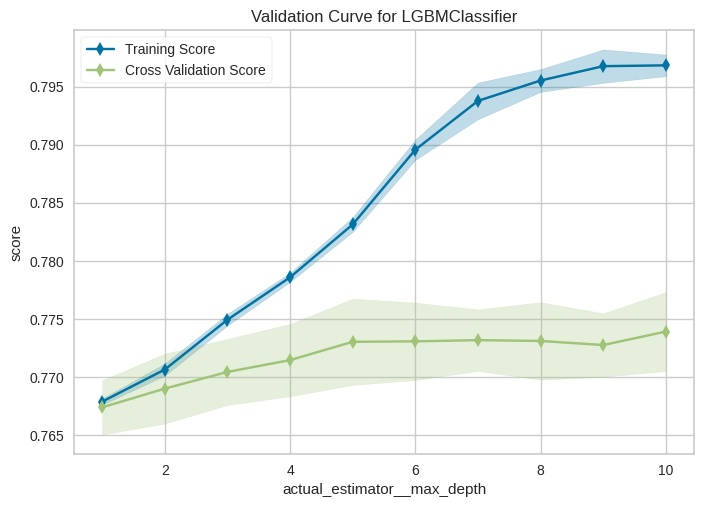

In [276]:
plot_model(top5[0],plot='vc')

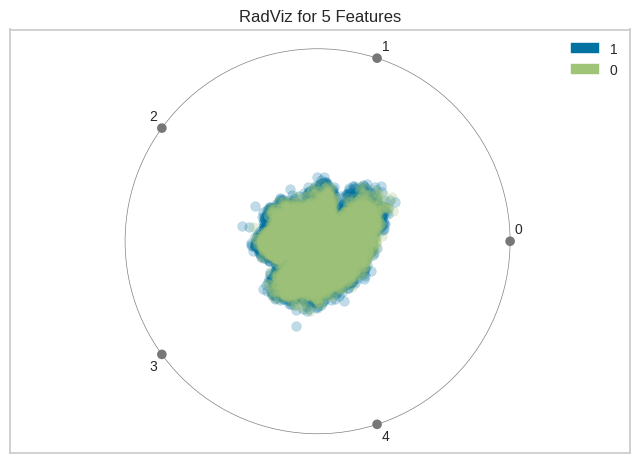

In [275]:
plot_model(top5[0],plot='dimension')

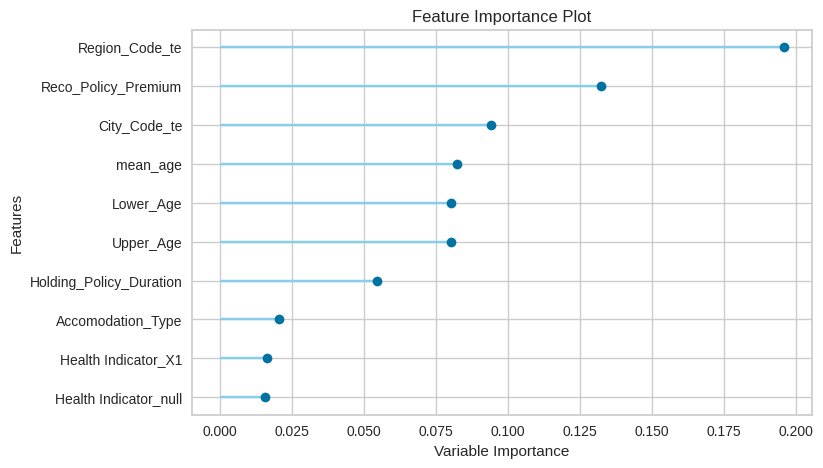

In [273]:
plot_model(top5[4],plot='feature')

In [ ]:
plot_model(top5[0],plot='feature_all')

In [277]:
plot_model(top5[4],plot='tree')

##Evaluate Model Widgets

In [283]:
evaluate_model(top5[4])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [303]:
get_config('y').values

array([0, 1, 1, ..., 0, 1, 0])

## RFE Analysis
**Analysis on train_data excluding ohe columns**
> Optimal number of features : 3<br>
> Best features : Index(['City_Code_te', 'Region_Code_te', 'Reco_Policy_Premium']

---


**Analysis on transformed X**
> Optimal number of features : 3<br>
> Best features : Index(['Region_Code_te', 'Upper_Age', 'Reco_Policy_Premium']
    


Optimal number of features : 3
Best features : Index(['City_Code_te', 'Region_Code_te', 'Reco_Policy_Premium'], dtype='object')
Original features : Index(['City_Code_te', 'Region_Code_te', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Is_Spouse', 'Is_Holding_Policy',
       'Holding_Policy_Duration', 'Upper_Age', 'Lower_Age', 'mean_age',
       'Reco_Policy_Premium', 'Response'],
      dtype='object')


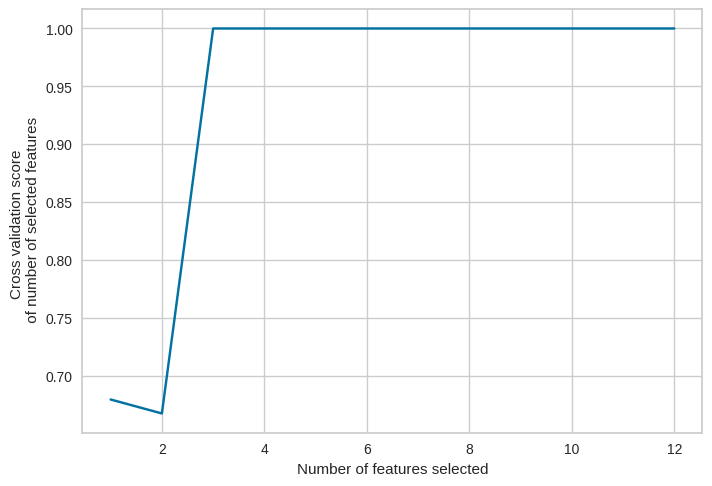

columns  to_use  rank
0              City_Code_te    True     1
1            Region_Code_te    True     1
2       Reco_Policy_Premium    True     1
3                  Response   False     2
4                 Upper_Age   False     3
5                 Lower_Age   False     4
6                  mean_age   False     5
7   Holding_Policy_Duration   False     6
8                 Is_Spouse   False     7
9         Is_Holding_Policy   False     8
10      Reco_Insurance_Type   False     9
11        Accomodation_Type   False    10

In [316]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold,StratifiedKFold #for K-fold cross validation
from sklearn.ensemble import RandomForestClassifier #Random Forest

#Analysis on train_data excluding ohe columns
X=train_data[[x for x in sel_col if x not in categorical_features]]
y=train_data['Response']
kfold = StratifiedKFold(n_splits=5, random_state=1) 
rfecv = RFECV(estimator=top5[0], step=1, cv=kfold,scoring='roc_auc')   
rfecv = rfecv.fit(X, y)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X.columns[rfecv.support_]) 
print('Original features :', X.columns)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score \n of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()
rfecv_df=pd.DataFrame(data={"columns":X.columns,"to_use":rfecv.support_,"rank":rfecv.ranking_}).sort_values("rank").reset_index(drop=True)
rfecv_df

Optimal number of features : 3
Best features : Index(['Region_Code_te', 'Upper_Age', 'Reco_Policy_Premium'], dtype='object')
Original features : Index(['City_Code_te', 'Region_Code_te', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Is_Spouse', 'Holding_Policy_Duration',
       'Upper_Age', 'Lower_Age', 'mean_age', 'Reco_Policy_Premium',
       'Health Indicator_X1', 'Health Indicator_X2', 'Health Indicator_X3',
       'Health Indicator_X4', 'Health Indicator_X5', 'Health Indicator_X6',
       'Health Indicator_X7', 'Health Indicator_X8', 'Health Indicator_X9',
       'Health Indicator_null', 'Holding_Policy_Type_1.0',
       'Holding_Policy_Type_2.0', 'Holding_Policy_Type_3.0',
       'Holding_Policy_Type_4.0', 'Holding_Policy_Type_null',
       'Reco_Policy_Cat_1.0', 'Reco_Policy_Cat_10.0', 'Reco_Policy_Cat_11.0',
       'Reco_Policy_Cat_12.0', 'Reco_Policy_Cat_13.0', 'Reco_Policy_Cat_14.0',
       'Reco_Policy_Cat_15.0', 'Reco_Policy_Cat_16.0', 'Reco_Policy_Cat_17.0',
       'R

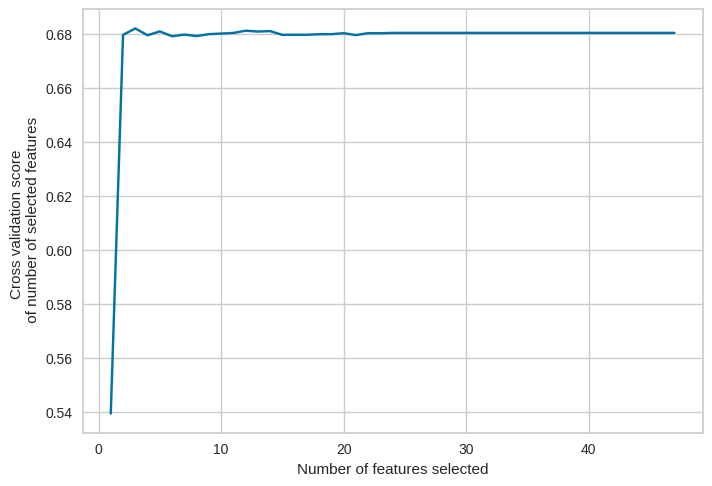

columns  to_use  rank
0             Region_Code_te    True     1
1        Reco_Policy_Premium    True     1
2                  Upper_Age    True     1
3               City_Code_te   False     2
4                  Lower_Age   False     3
5    Holding_Policy_Duration   False     4
6                   mean_age   False     5
7          Accomodation_Type   False     6
8        Health Indicator_X1   False     7
9    Holding_Policy_Type_1.0   False     8
10     Health Indicator_null   False     9
11   Holding_Policy_Type_3.0   False    10
12   Holding_Policy_Type_2.0   False    11
13       Health Indicator_X3   False    12
14       Health Indicator_X4   False    13
15       Health Indicator_X2   False    14
16       Health Indicator_X6   False    15
17                 Is_Spouse   False    16
18   Holding_Policy_Type_4.0   False    17
19       Health Indicator_X7   False    18
20  Holding_Policy_Type_null   False    19
21       Reco_Insurance_Type   False    20
22       Health Indicator_X5   False    21
23       Reco_Policy_Cat_1.0   False    22
24      Reco_Policy_Cat_10.0   False    23
25      Reco_Policy_Cat_11.0   False    24
26      Reco_Policy_Cat_12.0   False    25
27      Reco_Policy_Cat_13.0   False    26
28      Reco_Policy_Cat_14.0   False    27
29      Reco_Policy_Cat_15.0   False    28
30      Reco_Policy_Cat_16.0   False    29
31      Reco_Policy_Cat_17.0   False    30
32      Reco_Policy_Cat_18.0   False    31
33      Reco_Policy_Cat_19.0   False    32
34       Reco_Policy_Cat_2.0   False    33
35       Health Indicator_X8   False    34
36      Reco_Policy_Cat_20.0   False    35
37       Health Indicator_X9   False    36
38      Reco_Policy_Cat_21.0   False    37
39      Reco_Policy_Cat_22.0   False    38
40       Reco_Policy_Cat_3.0   False    39
41       Reco_Policy_Cat_4.0   False    40
42       Reco_Policy_Cat_5.0   False    41
43       Reco_Policy_Cat_6.0   False    42
44       Reco_Policy_Cat_7.0   False    43
45       Reco_Policy_Cat_8.0   False    44
46       Reco_Policy_Cat_9.0   False    45

In [317]:
#Analysis on transformed X 
X=get_config('X')
y=get_config('y')
kfold = StratifiedKFold(n_splits=5, random_state=1) 
rfecv = RFECV(estimator=top5[0], step=1, cv=kfold,scoring='roc_auc')   
rfecv = rfecv.fit(X, y)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X.columns[rfecv.support_]) 
print('Original features :', X.columns)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score \n of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()
rfecv_df=pd.DataFrame(data={"columns":X.columns,"to_use":rfecv.support_,"rank":rfecv.ranking_}).sort_values("rank").reset_index(drop=True)
rfecv_df

In [318]:
# from sklearn.feature_selection import RFE
# selector = RFE(top5[4], n_features_to_select=get_config('X').shape[1]*0.8, step=1)
# selector = selector.fit(get_config('X').values, get_config('y').values)
# rfe_df=pd.DataFrame(data={"columns":get_config('X').columns,"to_use":selector.support_,"rank":selector.ranking_}).sort_values("rank",ascending=False).reset_index(drop=True)
# rfe_df

## PCA Analysis
<li> 8 components give 99% information out of 11 components 
<li> After ohe 18 componenets are required out of 48 componenets giving more than 99% information

In [287]:
train_data

City_Code_te  Region_Code_te  ...  Reco_Policy_Premium  Response
45261      0.231368        0.239947  ...              16772.0         0
16196      0.235897        0.250000  ...               9440.0         1
44729      0.235897        0.285714  ...              17056.0         1
22633      0.242168        0.333333  ...              14160.0         0
37954      0.228645        0.218750  ...              12402.0         1
...             ...             ...  ...                  ...       ...
6743       0.243243        0.310345  ...              17160.0         0
13844      0.246072        0.249523  ...              10720.0         1
30571      0.228277        0.028602  ...              10416.0         0
47306      0.241971        0.374877  ...              24544.0         1
42711      0.246072        0.249991  ...              19264.0         0

[40705 rows x 15 columns]

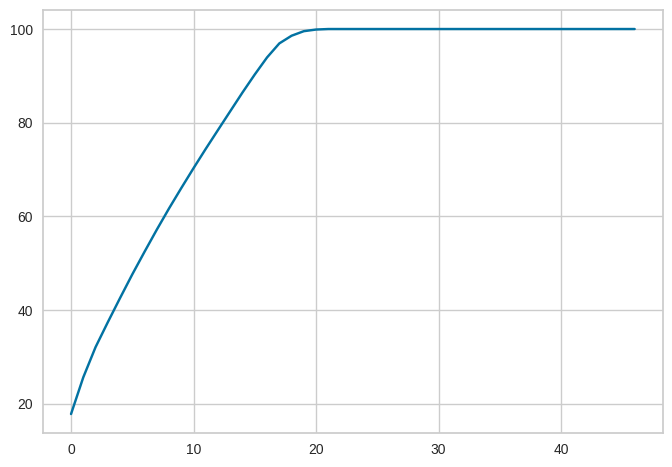

In [286]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
#PCA on Transformed dataset and after ohe of categorical columns
X = scale(get_config('X').values)
pca = PCA()
pca.fit(X)
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

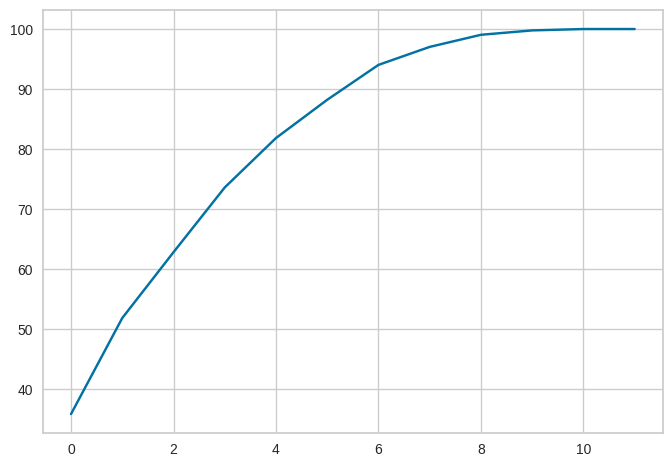

In [289]:
# PCA for all numerical columns except removing those categorical columns for which OHE was required
X = scale(train_data[[x for x in sel_col if x not in categorical_features]].values)
pca = PCA()
pca.fit(X)
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

## Blend Model

In [319]:
blender = blend_models(top5,fold=3,choose_better=False,optimize='auc',weights=None)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7702  0.7394  0.1434  0.5871  0.2305  0.1504  0.2028
1       0.7705  0.7394  0.1435  0.5892  0.2308  0.1510  0.2037
2       0.7722  0.7379  0.1610  0.5939  0.2534  0.1682  0.2186
Mean    0.7710  0.7389  0.1493  0.5900  0.2382  0.1565  0.2084
SD      0.0009  0.0007  0.0083  0.0028  0.0107  0.0082  0.0072

## Stack Model

In [323]:
stacker = stack_models(top5,meta_model=top5[0],fold=3,restack=True,choose_better=False,optimize='auc')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7677  0.7289  0.1404  0.5654  0.2249  0.1431  0.1917
1       0.7694  0.7314  0.1606  0.5692  0.2505  0.1620  0.2078
2       0.7710  0.7348  0.1970  0.5655  0.2922  0.1920  0.2302
Mean    0.7694  0.7317  0.1660  0.5667  0.2559  0.1657  0.2099
SD      0.0013  0.0024  0.0234  0.0018  0.0278  0.0202  0.0158

# Pycaret Setup2
<li> Using SMOTE
<li> Normalization of numerical columns

In [344]:
exp2 = setup(data = train_data,session_id=786,ignore_features=['ID'],
             categorical_features=categorical_features, numeric_features=numeric_features, 
             normalize=True,fix_imbalance=True,
             log_experiment=True,profile=True,
             target = 'Response')

Description             Value
0                               session_id               786
1                                   Target          Response
2                              Target Type            Binary
3                            Label Encoded        0: 0, 1: 1
4                            Original Data       (40705, 14)
5                           Missing Values             False
6                         Numeric Features                10
7                     Categorical Features                 2
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set       (28493, 24)
12                    Transformed Test Set       (12212, 24)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment              True
20                         Experiment Name  clf-default-name
21                                     USI              5f18
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44                              Clustering             False
45                    Clustering Iteration              None
46                     Polynomial Features             False
47                       Polynomial Degree              None
48                    Trignometry Features             False
49                    Polynomial Threshold              None
50                          Group Features             False
51                       Feature Selection             False
52                Feature Selection Method           classic
53            Features Selection Threshold              None
54                     Feature Interaction             False
55                           Feature Ratio             False
56                   Interaction Threshold              None
57                           Fix Imbalance              True
58                    Fix Imbalance Method             SMOTE

Data Profiler Failed. No output to show, please continue with Modeling.


In [345]:
top5=compare_models(n_select=5,sort='auc')
top5_summary=pull()
top5_summary
top5_model_name=top5_summary.index.to_list()[:5]

Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.7662  0.7409  0.2784  0.5238   
gbc          Gradient Boosting Classifier    0.7198  0.7290  0.4959  0.4277   
lr                    Logistic Regression    0.6644  0.7284  0.6533  0.3833   
lda          Linear Discriminant Analysis    0.6662  0.7282  0.6479  0.3843   
ada                  Ada Boost Classifier    0.6640  0.7181  0.6151  0.3773   
rf               Random Forest Classifier    0.7388  0.7135  0.3166  0.4388   
et                 Extra Trees Classifier    0.7274  0.6915  0.3021  0.4079   
nb                            Naive Bayes    0.4865  0.6833  0.8504  0.2995   
knn                K Neighbors Classifier    0.6063  0.6296  0.5643  0.3190   
dt               Decision Tree Classifier    0.6854  0.5896  0.4054  0.3615   
qda       Quadratic Discriminant Analysis    0.3160  0.5049  0.8666  0.2420   
svm                   SVM - Linear Kernel    0.6536  0.0000  0.6473  0.3731   
ridge                    Ridge Classifier    0.6663  0.0000  0.6479  0.3843   

              F1   Kappa     MCC  TT (Sec)  
lightgbm  0.3633  0.2364  0.2542     1.480  
gbc       0.4592  0.2715  0.2730     7.338  
lr        0.4831  0.2589  0.2791     2.275  
lda       0.4824  0.2591  0.2784     0.976  
ada       0.4676  0.2422  0.2578     2.422  
rf        0.3677  0.2086  0.2130     6.603  
et        0.3470  0.1796  0.1829     6.514  
nb        0.4429  0.1364  0.2040     0.979  
knn       0.4076  0.1456  0.1589     4.416  
dt        0.3820  0.1720  0.1726     1.161  
qda       0.3779  0.0048  0.0104     0.880  
svm       0.4727  0.2420  0.2629     1.108  
ridge     0.4824  0.2592  0.2785     0.860

In [346]:
pred_eval=pd.DataFrame()
for model,name in zip(top5,top5_model_name):
  pred=predict_model(model,test_data,raw_score=True)
  pred_eval[name]=get_metrics()['Score Function'][1:2].apply(lambda x :x(pred['Response'],pred['Score_1']))
  # pred_eval[name+"_custom_auc"]=roc_auc_score(pred['Response'],pred['Score_1'])
pred_eval

lightgbm       gbc        lr       lda      ada
ID                                                  
auc   0.75027  0.737788  0.738462  0.738418  0.72238

In [347]:
blender = blend_models(top5,fold=3,choose_better=False,optimize='auc',weights=None)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7274  0.7404  0.5132  0.4417  0.4747  0.2921  0.2936
1       0.7204  0.7354  0.5037  0.4295  0.4637  0.2761  0.2778
2       0.7130  0.7352  0.5362  0.4227  0.4727  0.2793  0.2830
Mean    0.7202  0.7370  0.5177  0.4313  0.4704  0.2825  0.2848
SD      0.0059  0.0024  0.0136  0.0079  0.0048  0.0069  0.0066

In [349]:
blender = blend_models(top5,fold=3,choose_better=True,optimize='auc',weights=None)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7274  0.7404  0.5132  0.4417  0.4747  0.2921  0.2936
1       0.7204  0.7354  0.5037  0.4295  0.4637  0.2761  0.2778
2       0.7130  0.7352  0.5362  0.4227  0.4727  0.2793  0.2830
Mean    0.7202  0.7370  0.5177  0.4313  0.4704  0.2825  0.2848
SD      0.0059  0.0024  0.0136  0.0079  0.0048  0.0069  0.0066

In [351]:
pred=predict_model(blender,test_data,raw_score=True)
pred_eval['blender']=get_metrics()['Score Function'][1:2].apply(lambda x :x(pred['Response'],pred['Score_1']))
pred_eval

lightgbm       gbc        lr       lda      ada   blender
ID                                                            
auc   0.75027  0.737788  0.738462  0.738418  0.72238  0.746776

In [348]:
stacker = stack_models(top5,meta_model=top5[2],fold=3,restack=True,choose_better=False,optimize='auc')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7249  0.7381  0.5167  0.4381  0.4741  0.2896  0.2914
1       0.7197  0.7379  0.5094  0.4292  0.4659  0.2778  0.2797
2       0.7114  0.7362  0.5524  0.4225  0.4788  0.2841  0.2890
Mean    0.7187  0.7374  0.5262  0.4299  0.4729  0.2838  0.2867
SD      0.0056  0.0008  0.0188  0.0064  0.0053  0.0048  0.0051

# Pycaret Setup3
<li> Using SMOTE
<li> Normalization of numerical columns
<li> Removing MultiCollinear columns above 0.9
<li> Using PCA to keep information upto 99%
<li> 

In [14]:
exp2 = setup(data = train_data,session_id=786,ignore_features=['ID'],
             categorical_features=categorical_features, numeric_features=numeric_features,
             high_cardinality_features=high_cardinality_features,
             normalize=True,fix_imbalance=True,
             pca=True,pca_components=0.99,
             remove_multicollinearity=True,multicollinearity_threshold=0.9,
             log_experiment=True,
             target = 'Response')

Description             Value
0                               session_id               786
1                                   Target          Response
2                              Target Type            Binary
3                            Label Encoded        0: 0, 1: 1
4                            Original Data       (40705, 13)
5                           Missing Values             False
6                         Numeric Features                 2
7                     Categorical Features                 9
8                         Ordinal Features             False
9                High Cardinality Features              True
10                 High Cardinality Method         frequency
11                   Transformed Train Set       (28493, 11)
12                    Transformed Test Set       (12212, 11)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment              True
20                         Experiment Name  clf-default-name
21                                     USI              cba5
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components              0.99
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity              True
43             Multicollinearity Threshold               0.9
44                              Clustering             False
45                    Clustering Iteration              None
46                     Polynomial Features             False
47                       Polynomial Degree              None
48                    Trignometry Features             False
49                    Polynomial Threshold              None
50                          Group Features             False
51                       Feature Selection             False
52                Feature Selection Method           classic
53            Features Selection Threshold              None
54                     Feature Interaction             False
55                           Feature Ratio             False
56                   Interaction Threshold              None
57                           Fix Imbalance              True
58                    Fix Imbalance Method             SMOTE

In [15]:
top5=compare_models(n_select=10,sort='auc',fold=3)
top5_summary=pull()
top5_summary
top5_model_name=top5_summary.index.to_list()[:5]

Model  Accuracy     AUC  Recall   Prec.  \
rf               Random Forest Classifier    0.6656  0.5533  0.2565  0.2830   
et                 Extra Trees Classifier    0.6812  0.5493  0.2189  0.2857   
lightgbm  Light Gradient Boosting Machine    0.5696  0.5393  0.4516  0.2663   
knn                K Neighbors Classifier    0.5506  0.5388  0.4776  0.2613   
lr                    Logistic Regression    0.5217  0.5369  0.5064  0.2524   
lda          Linear Discriminant Analysis    0.5218  0.5369  0.5064  0.2525   
qda       Quadratic Discriminant Analysis    0.5117  0.5279  0.5351  0.2544   
gbc          Gradient Boosting Classifier    0.5176  0.5262  0.5149  0.2524   
nb                            Naive Bayes    0.5205  0.5260  0.5165  0.2543   
ada                  Ada Boost Classifier    0.5155  0.5194  0.5105  0.2502   
dt               Decision Tree Classifier    0.6016  0.5180  0.3573  0.2599   
svm                   SVM - Linear Kernel    0.4740  0.0000  0.6000  0.2515   
ridge                    Ridge Classifier    0.5218  0.0000  0.5064  0.2525   

              F1   Kappa     MCC  TT (Sec)  
rf        0.2691  0.0529  0.0531   12.0267  
et        0.2479  0.0501  0.0508    3.9000  
lightgbm  0.3350  0.0473  0.0509    0.7133  
knn       0.3378  0.0399  0.0441    1.5167  
lr        0.3369  0.0245  0.0282    1.2567  
lda       0.3369  0.0245  0.0283    0.2500  
qda       0.3447  0.0288  0.0338    0.2200  
gbc       0.3387  0.0246  0.0285   13.5633  
nb        0.3408  0.0283  0.0327    0.2200  
ada       0.3358  0.0203  0.0236    3.1200  
dt        0.3009  0.0320  0.0327    0.9067  
svm       0.3512  0.0237  0.0306    0.3567  
ridge     0.3369  0.0245  0.0283    0.2167

In [24]:
pred_eval=pd.DataFrame()
for model,name in zip(top5,top5_model_name):
  pred=predict_model(model,test_data,raw_score=True)
  pred_eval[name]=get_metrics()['Score Function'][1:2].apply(lambda x :x(pred['Response'],pred['Score_1']))
  # pred_eval[name+"_custom_auc"]=roc_auc_score(pred['Response'],pred['Score_1'])
pred_eval

lr       lda       gbc        nb  lightgbm
ID                                                   
auc  0.738297  0.738255  0.732595  0.722744  0.726959

In [25]:
blender = blend_models(top5,fold=3,choose_better=False,optimize='auc',weights=None)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6828  0.7238  0.5943  0.3936  0.4735  0.2597  0.2710
1       0.6817  0.7218  0.5884  0.3914  0.4701  0.2556  0.2664
2       0.6709  0.7196  0.6099  0.3833  0.4708  0.2497  0.2638
Mean    0.6785  0.7217  0.5975  0.3894  0.4715  0.2550  0.2671
SD      0.0053  0.0017  0.0091  0.0044  0.0015  0.0041  0.0030

In [26]:
pred=predict_model(blender,test_data,raw_score=True)
pred_eval['blender']=get_metrics()['Score Function'][1:2].apply(lambda x :x(pred['Response'],pred['Score_1']))
pred_eval

lr       lda       gbc        nb  lightgbm   blender
ID                                                             
auc  0.738297  0.738255  0.732595  0.722744  0.726959  0.731422

In [38]:
stacker = stack_models(top5,meta_model=top5[0],fold=3,restack=True,choose_better=False,optimize='auc')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7362  0.6524  0.1890  0.3961  0.2559  0.1194  0.1314
1       0.7353  0.6444  0.1812  0.3893  0.2473  0.1119  0.1240
2       0.7343  0.6565  0.1847  0.3877  0.2502  0.1128  0.1243
Mean    0.7353  0.6511  0.1850  0.3910  0.2512  0.1147  0.1266
SD      0.0007  0.0050  0.0032  0.0037  0.0036  0.0033  0.0035

In [ ]:
pred=predict_model(stacker,test_data,raw_score=True)
pred_eval['stacker']=get_metrics()['Score Function'][1:2].apply(lambda x :x(pred['Response'],pred['Score_1']))
pred_eval

In [ ]:
blender2 = blend_models([blender,stacker],fold=3,choose_better=False,optimize='auc',weights=None)

In [ ]:
blender = blend_models(top5,fold=3,choose_better=False,optimize='auc',weights=None)

In [ ]:
stacker = stack_models(top5,meta_model=top5[0],fold=3,restack=True,choose_better=False,optimize='auc')

In [ ]:
pred=predict_model(stacker,test_data,raw_score=True)
pred_eval['stacker']=get_metrics()['Score Function'][1:2].apply(lambda x :x(pred['Response'],pred['Score_1']))

#Pycaret Setup4

In [18]:
exp2 = setup(data = train_data,session_id=786,ignore_features=['ID'],
             categorical_features=categorical_features, numeric_features=numeric_features, 
             high_cardinality_features=['Health Indicator'],high_cardinality_method='clustering',
             normalize=True,fix_imbalance=True,pca=True,remove_multicollinearity=True,multicollinearity_threshold=0.9,
            #  create_clusters=True,polynomial_features=True,polynomial_degree=2,
            #  feature_selection=True,feature_selection_threshold=0.5,
             log_experiment=True,silent=True,
             target = 'Response')

Description             Value
0                               session_id               786
1                                   Target          Response
2                              Target Type            Binary
3                            Label Encoded        0: 0, 1: 1
4                            Original Data       (40705, 14)
5                           Missing Values             False
6                         Numeric Features                10
7                     Categorical Features                 2
8                         Ordinal Features             False
9                High Cardinality Features              True
10                 High Cardinality Method        clustering
11                   Transformed Train Set       (28493, 10)
12                    Transformed Test Set       (12212, 10)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment              True
20                         Experiment Name  clf-default-name
21                                     USI              4f1a
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components              0.99
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity              True
43             Multicollinearity Threshold               0.9
44                              Clustering              True
45                    Clustering Iteration                20
46                     Polynomial Features              True
47                       Polynomial Degree                 2
48                    Trignometry Features             False
49                    Polynomial Threshold               0.1
50                          Group Features             False
51                       Feature Selection              True
52                Feature Selection Method           classic
53            Features Selection Threshold               0.5
54                     Feature Interaction             False
55                           Feature Ratio             False
56                   Interaction Threshold              None
57                           Fix Imbalance              True
58                    Fix Imbalance Method             SMOTE

In [19]:
top5=compare_models(n_select=10,sort='auc',fold=3)
top5_summary=pull()
top5_summary
top5_model_name=top5_summary.index.to_list()[:5]

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.6636  0.7288  0.6562  0.3829   
lda          Linear Discriminant Analysis    0.6653  0.7287  0.6500  0.3837   
gbc          Gradient Boosting Classifier    0.6346  0.7266  0.7052  0.3650   
nb                            Naive Bayes    0.6465  0.7221  0.6696  0.3697   
lightgbm  Light Gradient Boosting Machine    0.6499  0.7206  0.6644  0.3717   
qda       Quadratic Discriminant Analysis    0.6453  0.7168  0.6628  0.3676   
ada                  Ada Boost Classifier    0.6356  0.7162  0.6771  0.3616   
rf               Random Forest Classifier    0.7067  0.7030  0.4497  0.4010   
et                 Extra Trees Classifier    0.7197  0.6967  0.3669  0.4068   
knn                K Neighbors Classifier    0.6131  0.6372  0.5660  0.3246   
dt               Decision Tree Classifier    0.6435  0.5779  0.4516  0.3252   
svm                   SVM - Linear Kernel    0.6369  0.0000  0.6936  0.3650   
ridge                    Ridge Classifier    0.6653  0.0000  0.6500  0.3837   

              F1   Kappa     MCC  TT (Sec)  
lr        0.4835  0.2589  0.2796    1.2867  
lda       0.4825  0.2588  0.2785    0.2600  
gbc       0.4809  0.2408  0.2720   12.5233  
nb        0.4762  0.2418  0.2662    0.2300  
lightgbm  0.4766  0.2440  0.2673    0.7600  
qda       0.4728  0.2374  0.2609    0.2400  
ada       0.4714  0.2307  0.2573    2.9500  
rf        0.4239  0.2280  0.2287   12.2833  
et        0.3858  0.2048  0.2053    3.9767  
knn       0.4125  0.1546  0.1680    1.7000  
dt        0.3781  0.1375  0.1411    0.7533  
svm       0.4782  0.2389  0.2681    0.3300  
ridge     0.4825  0.2588  0.2785    0.2267

In [20]:
pred_eval=pd.DataFrame()
for model,name in zip(top5,top5_model_name):
  pred=predict_model(model,test_data,raw_score=True)
  pred_eval[name]=get_metrics()['Score Function'][1:2].apply(lambda x :x(pred['Response'],pred['Score_1']))
  # pred_eval[name+"_custom_auc"]=roc_auc_score(pred['Response'],pred['Score_1'])
pred_eval

lr       lda       gbc        nb  lightgbm
ID                                                 
auc  0.7381  0.738128  0.736567  0.731075  0.730145

In [21]:
blender = blend_models(top5,fold=3,choose_better=False,optimize='auc',weights=None)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6818  0.7286  0.5947  0.3926  0.4730  0.2585  0.2700
1       0.6807  0.7252  0.5937  0.3910  0.4715  0.2564  0.2678
2       0.6696  0.7267  0.6244  0.3841  0.4756  0.2539  0.2699
Mean    0.6774  0.7269  0.6043  0.3892  0.4734  0.2563  0.2692
SD      0.0055  0.0014  0.0142  0.0037  0.0017  0.0019  0.0010

In [ ]:
stacker = stack_models(top5,meta_model=top5[0],fold=3,restack=True,choose_better=False,optimize='auc')

IntProgress(value=0, description='Processing: ', max=6)

Initiated  . . . . . . . . . . . . . . . . . .             19:31:48
Status     . . . . . . . . . . . . . . . . . .     Finalizing Model
Estimator  . . . . . . . . . . . . . . . . . .  Stacking Classifier

Empty DataFrame
Columns: [Accuracy, AUC, Recall, Prec., F1, Kappa, MCC]
Index: []

In [ ]:
pred=predict_model(blender,test_data,raw_score=True)
pred_eval['blender']=get_metrics()['Score Function'][1:2].apply(lambda x :x(pred['Response'],pred['Score_1']))
pred=predict_model(stacker,test_data,raw_score=True)
pred_eval['stacker']=get_metrics()['Score Function'][1:2].apply(lambda x :x(pred['Response'],pred['Score_1']))
pred_eval

In [ ]:
final_model = finalize_model(blender)

# Specific Model Setup

In [88]:
sel_col=['ID',
         'City_Code_te', 'Region_Code_te','Reco_Policy_Cat_te','Holding_Policy_Duration_te','Health Indicator_te', 'Holding_Policy_Type_te',
         'Accomodation_Type','Reco_Insurance_Type', 'Is_Spouse','Is_Holding_Policy',
         'Health_Indicator_Grouped', 'Holding_Policy_Type','Reco_Policy_Cat', 'Holding_Policy_Duration','City_Code',
        'mean_age','Reco_Policy_Premium',
        'Response']

categorical_features=['Health_Indicator_Grouped', 'Holding_Policy_Type','Reco_Policy_Cat',
                      'City_Code']
high_cardinality_features=['City_Code']
# ordinal_features={'Holding_Policy_Duration':list(range(16))}

numeric_features=[x for x in sel_col[:-1] if x not in categorical_features]
left_out_col=[x for x in train.columns if x not in sel_col]

print("left_out_col",left_out_col)
train_data, test_data, y_train, y_test = train_test_split(
    train[sel_col], train[sel_col[-1]], test_size=0.2, random_state=786)
print(train_data.shape,test_data.shape,train.shape,train_data.shape[0]+test_data.shape[0])

left_out_col ['Region_Code', 'Upper_Age', 'Lower_Age', 'Health Indicator']
(40705, 19) (10177, 19) (50882, 23) 50882


In [89]:
exp = setup(data = train_data,session_id=786,ignore_features=['ID'],train_size=0.8,
             categorical_features=categorical_features, numeric_features=numeric_features, 
            high_cardinality_features=high_cardinality_features,high_cardinality_method='frequency',#'clustering',
            #ordinal_features=ordinal_features,
            combine_rare_levels=True,rare_level_threshold=0.1,
            ignore_low_variance=True,
             normalize=True,fix_imbalance=True,pca=True,remove_multicollinearity=True,multicollinearity_threshold=0.9,
            remove_outliers=True,outliers_threshold=0.05,
            #  create_clusters=True,polynomial_features=True,polynomial_degree=2,
            #  feature_selection=True,feature_selection_threshold=0.5,
             log_experiment=True,
             target = 'Response')

Description             Value
0                               session_id               786
1                                   Target          Response
2                              Target Type            Binary
3                            Label Encoded        0: 0, 1: 1
4                            Original Data       (40705, 19)
5                           Missing Values             False
6                         Numeric Features                13
7                     Categorical Features                 4
8                         Ordinal Features             False
9                High Cardinality Features              True
10                 High Cardinality Method         frequency
11                   Transformed Train Set       (27068, 30)
12                    Transformed Test Set       (12212, 30)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment              True
20                         Experiment Name  clf-default-name
21                                     USI              3539
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components              0.99
36                     Ignore Low Variance              True
37                     Combine Rare Levels              True
38                    Rare Level Threshold               0.1
39                         Numeric Binning             False
40                         Remove Outliers              True
41                      Outliers Threshold              0.05
42                Remove Multicollinearity              True
43             Multicollinearity Threshold               0.9
44                              Clustering             False
45                    Clustering Iteration              None
46                     Polynomial Features             False
47                       Polynomial Degree              None
48                    Trignometry Features             False
49                    Polynomial Threshold              None
50                          Group Features             False
51                       Feature Selection             False
52                Feature Selection Method           classic
53            Features Selection Threshold              None
54                     Feature Interaction             False
55                           Feature Ratio             False
56                   Interaction Threshold              None
57                           Fix Imbalance              True
58                    Fix Imbalance Method             SMOTE

In [90]:
top5=compare_models(n_select=10,sort='auc',fold=3)
top5_summary=pull()
top5_summary
top5_model_name=top5_summary.index.to_list()[:5]

Model  Accuracy     AUC  Recall   Prec.  \
gbc          Gradient Boosting Classifier    0.6750  0.7267  0.6261  0.3939   
lda          Linear Discriminant Analysis    0.6615  0.7260  0.6466  0.3835   
lr                    Logistic Regression    0.6613  0.7259  0.6498  0.3837   
lightgbm  Light Gradient Boosting Machine    0.7022  0.7247  0.5227  0.4112   
rf               Random Forest Classifier    0.7282  0.7148  0.4005  0.4356   
ada                  Ada Boost Classifier    0.6669  0.7082  0.5930  0.3810   
et                 Extra Trees Classifier    0.7404  0.7059  0.3246  0.4524   
qda       Quadratic Discriminant Analysis    0.5547  0.6674  0.7462  0.3209   
nb                            Naive Bayes    0.5763  0.6504  0.6658  0.3208   
knn                K Neighbors Classifier    0.5987  0.6339  0.6112  0.3262   
dt               Decision Tree Classifier    0.6475  0.5703  0.4199  0.3254   
svm                   SVM - Linear Kernel    0.6624  0.0000  0.6241  0.3813   
ridge                    Ridge Classifier    0.6616  0.0000  0.6466  0.3835   

              F1   Kappa     MCC  TT (Sec)  
gbc       0.4835  0.2639  0.2790   33.2667  
lda       0.4814  0.2538  0.2730    0.8367  
lr        0.4825  0.2548  0.2744    2.0233  
lightgbm  0.4603  0.2587  0.2623    1.8433  
rf        0.4173  0.2405  0.2409   15.4567  
ada       0.4639  0.2386  0.2509    7.1900  
et        0.3780  0.2196  0.2244    5.1833  
qda       0.4488  0.1651  0.2071    0.7600  
nb        0.4330  0.1563  0.1831    0.7367  
knn       0.4254  0.1588  0.1773    9.8100  
dt        0.3667  0.1279  0.1299    2.2533  
svm       0.4731  0.2456  0.2620    0.9033  
ridge     0.4814  0.2538  0.2730    0.7233

In [93]:
xgb=create_model('lightgbm',cross_validation=False,fold=5)

ValueError: ignored

# Finalize Model

In [34]:
final_model = finalize_model(blender)

In [35]:
pred=predict_model(final_model,test_data,raw_score=True)
pred_eval['final_model']=get_metrics()['Score Function'][1:2].apply(lambda x :x(pred['Response'],pred['Score_1']))
pred_eval

lr       lda       gbc        nb  lightgbm   blender  final_model
ID                                                                          
auc  0.738297  0.738255  0.732595  0.722744  0.726959  0.731422     0.731703

# Getting Submission File

In [ ]:
test['Response']=-1
test_pred=predict_model(final_model, data = test[sel_col],raw_score=True)
# test_pred=test[['ID']].m
erge(test_pred,left_index=True,right_index=True)
test_pred.head()

In [ ]:
submission=test_pred[['ID','Score_1']]
submission.columns=['ID','Response']
submission.to_csv('submission_run5_blender.csv',index=False)
submission.head()